In [1]:
pip install imbalanced-learn

     |████████████████████████████████| 167 kB 4.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install tensorflow

     |████████████████████████████████| 320.4 MB 20 kB/s  eta 0:00:011  |▋                               | 6.6 MB 3.8 MB/s eta 0:01:23     |██▋                             | 26.7 MB 3.8 MB/s eta 0:01:18     |█████▋                          | 56.7 MB 5.2 MB/s eta 0:00:51     |██████▏                         | 62.3 MB 5.2 MB/s eta 0:00:50     |███████                         | 69.4 MB 6.9 MB/s eta 0:00:37 |█████████▏                      | 91.3 MB 6.9 MB/s eta 0:00:34        | 133.6 MB 19.9 MB/s eta 0:00:10        | 137.6 MB 19.9 MB/s eta 0:00:10     |███████████████▌                | 155.6 MB 19.9 MB/s eta 0:00:09     |█████████████████▉              | 178.6 MB 12.6 MB/s eta 0:00:12     |██████████████████              | 179.4 MB 12.6 MB/s eta 0:00:12     |████████████████████            | 199.5 MB 20.6 MB/s eta 0:00:06��████▍           | 204.3 MB 20.6 MB/s eta 0:00:06     |██████████████████████▏         | 221.9 MB 32.6 MB/s eta 0:00:04        | 230.5 MB 32.6 MB/s eta 0:00:031 MB 32.6 

    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.19.4
Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_aa6d53b46ca443dea5b8031d958bc35c.csv"
df=pd.read_csv(url)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [2]:
df.shape

(748, 5)

In [3]:
X=df.drop(["whether he/she donated blood in March 2007"],axis=1)
X.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [4]:
y=df[["whether he/she donated blood in March 2007"]]
y.head()

,whether he/she donated blood in March 2007
0,1
1,1
2,1
3,1
4,0


In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,-0.927899,7.623346,7.623346,2.615633
1,-1.175118,1.282738,1.282738,-0.257881
2,-1.051508,1.796842,1.796842,0.029471
3,-0.927899,2.482313,2.482313,0.439973
4,-1.051508,3.167784,3.167784,1.753579


In [6]:
y.groupby("whether he/she donated blood in March 2007")["whether he/she donated blood in March 2007"].count()

whether he/she donated blood in March 2007
0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)
print(X_train.shape)
print(X_test.shape)

(448, 4)
(300, 4)


In [85]:
import numpy as np
from imblearn.ensemble import BalancedRandomForestClassifier
BForest=BForest=BalancedRandomForestClassifier(n_estimators=210,criterion="gini",max_depth=6,min_samples_split=3,
                                       min_samples_leaf=1,max_features="auto",bootstrap=True,
                                       sampling_strategy="not majority",replacement=False,n_jobs=-1,warm_start=False,
                                       random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
BForest

BalancedRandomForestClassifier(max_depth=6, min_samples_split=3,
                               n_estimators=210, n_jobs=-1, random_state=0,
                               sampling_strategy='not majority')

In [86]:
from sklearn.metrics import accuracy_score
train_pred=BForest.predict(X_train)
test_pred=BForest.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  0.859375
Accuracy on test data:  0.78


In [87]:
from sklearn.metrics import roc_auc_score
print("AUC on train data: ",roc_auc_score(y_train,train_pred))
print("AUC on test data: ",roc_auc_score(y_test,test_pred))

AUC on train data:  0.7288501056409366
AUC on test data:  0.6351451973194341


In [88]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for train data: \n",confusion_matrix(y_train,train_pred))
print("Confusion matrix for test data: \n",confusion_matrix(y_test,test_pred))

Confusion matrix for train data: 
 [[336  13]
 [ 50  49]]
Confusion matrix for test data: 
 [[208  13]
 [ 53  26]]


In [89]:
print("Specificity: ",208/(208+13))
print("Sensitivity: ",26/(26+53))

Specificity:  0.9411764705882353
Sensitivity:  0.3291139240506329


In [90]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
BBagging=BalancedBaggingClassifier(base_estimator=svm.SVC(C=0.92,decision_function_shape="ovo"),n_estimators=10,bootstrap=False,
                                   bootstrap_features=False,sampling_strategy="not majority",replacement=False,
                                  n_jobs=-1,random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
BBagging

BalancedBaggingClassifier(base_estimator=SVC(C=0.92,
                                             decision_function_shape='ovo'),
                          bootstrap=False, n_jobs=-1, random_state=0,
                          sampling_strategy='not majority')

In [91]:
train_pred=BBagging.predict(X_train)
test_pred=BBagging.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  0.8058035714285714
Accuracy on test data:  0.7433333333333333


In [92]:
print("AUC on train data: ",roc_auc_score(y_train,train_pred))
print("AUC on test data: ",roc_auc_score(y_test,test_pred))

AUC on train data:  0.5786952620763509
AUC on test data:  0.5329915802737843


In [93]:
print("Confusion matrix for train data: \n",confusion_matrix(y_train,train_pred))
print("Confusion matrix for test data: \n",confusion_matrix(y_test,test_pred))

Confusion matrix for train data: 
 [[344   5]
 [ 82  17]]
Confusion matrix for test data: 
 [[216   5]
 [ 72   7]]


In [94]:
print("Test data specificity: ",216/(216+5))
print("Test data sensitivity: ",7/(7+72))

Test data specificity:  0.9773755656108597
Test data sensitivity:  0.08860759493670886


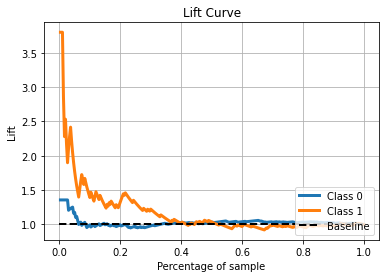

In [95]:
import scikitplot as skplt
import matplotlib.pyplot as plt
y_probas = BBagging.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()

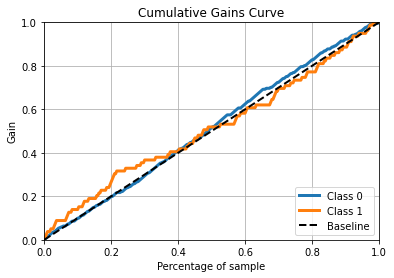

In [96]:
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

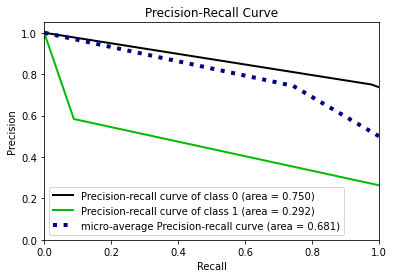

In [97]:
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


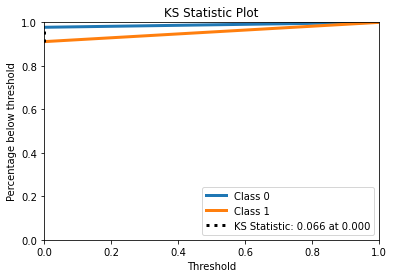

In [98]:
skplt.metrics.plot_ks_statistic(y_test, y_probas)
plt.show()

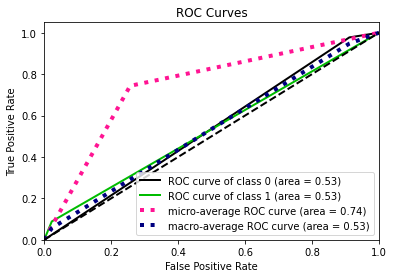

In [99]:
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

In [100]:
import keras
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout

In [101]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown="ignore")
y_train=pd.DataFrame(enc.fit_transform(y_train).toarray())
y_train.head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [102]:
y_test=pd.DataFrame(enc.fit_transform(y_test).toarray())
y_test.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [103]:
length=X_train.shape[1]
num_classes=y_test.shape[1]
print(length)
print(num_classes)

4
2


In [104]:
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(length, activation='relu', input_shape=(length,)))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200,activation="relu"))
    model.add(Dense(num_classes, activation='softmax'))
    opt=Adam(lr=0.008)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [105]:
model=classification_model()
model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=20, verbose=2)
model.evaluate(X_test,y_test,verbose=0)

Epoch 1/20
14/14 - 0s - loss: 0.5522 - accuracy: 0.7411 - val_loss: 0.5331 - val_accuracy: 0.7400
Epoch 2/20
14/14 - 0s - loss: 0.4695 - accuracy: 0.7879 - val_loss: 0.5167 - val_accuracy: 0.7567
Epoch 3/20
14/14 - 0s - loss: 0.4532 - accuracy: 0.7902 - val_loss: 0.5330 - val_accuracy: 0.7467
Epoch 4/20
14/14 - 0s - loss: 0.4469 - accuracy: 0.7835 - val_loss: 0.5131 - val_accuracy: 0.7767
Epoch 5/20
14/14 - 0s - loss: 0.4453 - accuracy: 0.7857 - val_loss: 0.5353 - val_accuracy: 0.7367
Epoch 6/20
14/14 - 0s - loss: 0.4586 - accuracy: 0.7946 - val_loss: 0.5069 - val_accuracy: 0.7967
Epoch 7/20
14/14 - 0s - loss: 0.4394 - accuracy: 0.7924 - val_loss: 0.5186 - val_accuracy: 0.7733
Epoch 8/20
14/14 - 0s - loss: 0.4346 - accuracy: 0.8058 - val_loss: 0.5073 - val_accuracy: 0.7800
Epoch 9/20
14/14 - 0s - loss: 0.4374 - accuracy: 0.8058 - val_loss: 0.5121 - val_accuracy: 0.7633
Epoch 10/20
14/14 - 0s - loss: 0.4305 - accuracy: 0.8170 - val_loss: 0.5043 - val_accuracy: 0.7733
Epoch 11/20
14/14 -

[0.5041235685348511, 0.7866666913032532]

In [106]:
test_pred=model.predict(X_test)

In [107]:
test_pred=enc.inverse_transform(test_pred)
y_test=enc.inverse_transform(y_test)

In [108]:
print("AUC on test data: ",roc_auc_score(y_test,test_pred))

AUC on test data:  0.6559367661378086


In [109]:
print("Confusion matrix on test data: \n",confusion_matrix(y_test,test_pred))

Confusion matrix on test data: 
 [[206  15]
 [ 49  30]]


In [110]:
y_pred=pd.DataFrame(model.predict(X_test)).rename(columns={0:"pred_0",1:"pred_1"})
y_pred.head()

,pred_0,pred_1
0,0.769984,0.230016
1,0.899532,0.100468
2,0.569028,0.430972
3,0.777432,0.222568
4,0.891987,0.108013


In [111]:
y_probs1=y_pred[["pred_1"]]

In [112]:
import numpy as np
thresholds=np.arange(0,1,0.001)

In [113]:
def to_labels(pos_probs,threshold):
    return (pos_probs >= threshold).astype('int')

In [114]:
from sklearn.metrics import f1_score
scores=[f1_score(y_test, to_labels(y_probs1,t),average="micro") for t in thresholds]

In [115]:
ix=np.argmax(scores)
print((thresholds[ix],scores[ix]))

(0.524, 0.7933333333333333)


In [116]:
len(y_probs1[y_probs1["pred_1"]>=0.45])

54

In [117]:
y_pred["pred_0"]=np.where((y_pred.pred_0 >=0.45),1,y_pred.pred_0)
y_pred["pred_0"]=np.where((y_pred.pred_0 < 0.45),0,y_pred.pred_0)
y_pred["pred_1"]=np.where((y_pred.pred_1 >=0.45),1,y_pred.pred_1)
y_pred["pred_1"]=np.where((y_pred.pred_1 <0.45),0,y_pred.pred_1)

In [118]:
len11=len(y_pred[y_pred["pred_1"]==1])
print("The number of predicted positive cases: ",len11)

The number of predicted positive cases:  54


In [119]:
300-54

246

In [120]:
y_pred["pred_0"]=np.where((y_pred.pred_0 == y_pred.pred_1),0,y_pred.pred_0)

In [121]:
len00=len(y_pred[y_pred["pred_0"]==1])
print("The number of predicted negative cases: ",len00)

The number of predicted negative cases:  246


In [122]:
y_pred=enc.inverse_transform(y_pred)

In [123]:
print("AUC after adjusting for the threshold: ",roc_auc_score(y_test,y_pred))

AUC after adjusting for the threshold:  0.6527578899135117


In [124]:
print("Confusion_matrix after adjusting the threshold: \n",confusion_matrix(y_test,y_pred))

Confusion_matrix after adjusting the threshold: 
 [[199  22]
 [ 47  32]]


In [125]:
print("Specificity: ",199/(199+22))
print("Sensitivity: ",32/(32+41))

Specificity:  0.9004524886877828
Sensitivity:  0.4383561643835616
